# Introduction

MNIST is an image collection with images of hand written digits with labels. PyTorch provides a wrapper for easy download in experiments

# Data Loader

We explicitly download data with a method instead of in the constructor for more intentional download of a large dataset.

In [10]:
import torch
import torchvision

# Classic dataset with images of hand written digits
class MnistData():
    def __init__(self, batch_size = 32):
        self.transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor()
        ])
        self.batch_size = batch_size
        self.training = None
        self.validation = None

    def download(self, root):
        self.training = torchvision.datasets.MNIST(
            root=root,
            transform=self.transforms,
            train=True,
            download=True)
        self.validation = torchvision.datasets.MNIST(
            root=root,
            transform=self.transforms,
            train=False,
            download=True)

    def get_dataloader(self, train):
        if train:
            data = self.training
        else:
            data = self.validation

        return torch.utils.data.DataLoader(data, self.batch_size, 
                                      shuffle=train,
                                      num_workers=4)
    
    def training_dataloader(self):
        return self.get_dataloader(train=True)

    def validation_dataloader(self):
        return self.get_dataloader(train=False)

In [11]:
data = MnistData()
data.download(root="./data")
print(f"Training size: {len(data.training)}")
print(f"Validation size: {len(data.validation)}")

Training size: 60000
Validation size: 10000


In [12]:
data.training[0][0].shape

torch.Size([1, 28, 28])

In [14]:
X,y = next(iter(data.training_dataloader()))
print(f"X shape: {X.shape}, X type: {X.dtype}")
print(f"y shape: {y.shape}, y type: {y.dtype}")

X shape: torch.Size([32, 1, 28, 28]), X type: torch.float32
y shape: torch.Size([32]), y type: torch.int64


In [15]:
print(data.training.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [19]:
data.training.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

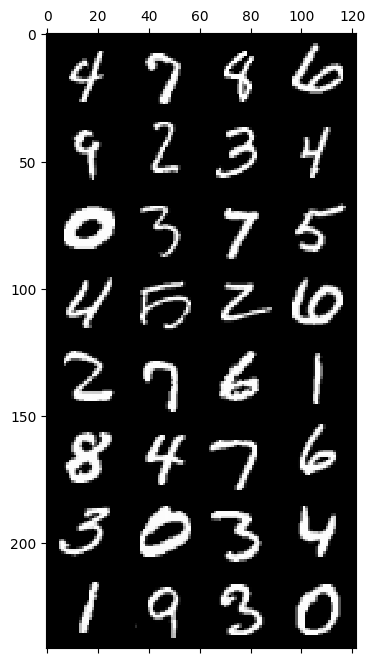

In [20]:
import matplotlib.pyplot as plt

with torch.no_grad():
    grid = torchvision.utils.make_grid(X, nrow=4)
    grid_np = grid.cpu().numpy().transpose(1, 2, 0)
    plt.matshow(grid_np)